#### `Inequality constrained` optimization

For twice-differentiable convex functions $f_i$, we want to

$$\min f_0(x), \text{s.t. } f_i(x)\leq 0, i=1, \cdots, m, \,Ax=b$$

where $A\in \mathbf{R}^{p \times n}, \, \text{rank }A=p$, and $p^*$ is optimal value

Assume the problem is `strictly feasible`, therefore strong duality holds (Slater's condition)

Examples include LP, QP, QCQP, etc.

#### Objective of interior point method

The idea of interior point methods is to `convert` solving an inequality constrained problem into solving a `sequence of small number` of unconstrained or equality constrained problems (which we know how to solve, e.g., Newton's method)

The sequence of problems is `parameterized` by some parameter, say $t$

#### Log-barrier function

Define log-barrier function $\phi(x)$ as

$$\phi(x)=-\sum_{i=1}^m \log (-f_i(x)), \text{dom }\phi=\{x|f_1(x)<0,\cdots,f_m(x)<0\} $$

The inequality constraints can be put into the objective

$$\min f_0(x)+\frac{1}{t}\phi(x), \text{s.t. } Ax=b$$

where $t>0$

This is because as $f_i(x)$ approches 0 (from negative), the penalty increases drastically, making sure $x$ actually never reaches the boundary

The approximation improves as $t\rightarrow \infty$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

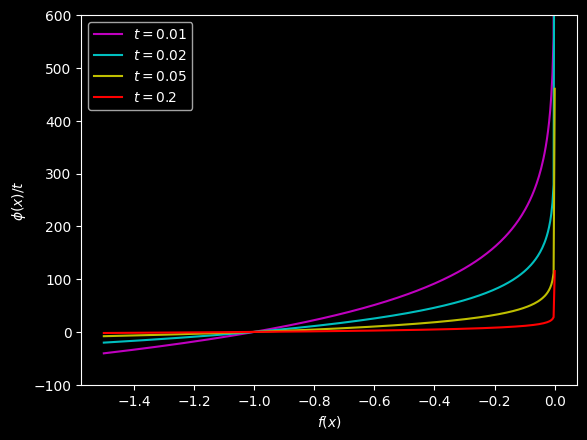

In [2]:
def log_barrier(fx, t):
    return -np.log(-fx)/t

x = np.linspace(-1.5, -1e-10, 400)

plt.plot(x, log_barrier(x, 0.01), label="$t=0.01$", linestyle='-', color='m')
plt.plot(x, log_barrier(x, 0.02), label="$t=0.02$", linestyle='-', color='c')
plt.plot(x, log_barrier(x, 0.05), label="$t=0.05$", linestyle='-', color='y')
plt.plot(x, log_barrier(x, 0.2), label="$t=0.2$", linestyle='-', color='r')

plt.xlabel("$f(x)$")
plt.ylabel("$\phi(x)/t$")
plt.ylim(-100, 600)
plt.legend()
plt.show()

This is now an equality constrained problem and the objective function is twice differentiable with

$$\begin{align*}
\nabla \phi(x)&=\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla f_i(x) \\
\nabla^2 \phi(x)&=\sum_{i=1}^m\frac{1}{f_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T+\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla^2 f_i(x)
\end{align*}$$


#### Centering problem and central path

For $t>0$, let $x^*(t)$ as the solution of the `centering problem`

$$\boxed{\min tf_0(x)+\phi(x), \text{s.t. } Ax=b}$$

the `central path` is defined as the trajectory that traces the solution as $t$ changes

$$\{x^*(t)|t>0\}$$

(when $t=0$, the objective is to minimize the log-barrier function, which would keep $x$ as far away from each boundary as possible and the solution $x^*(0)$ is the analytic center)

#### Optimality condition and Lagrangian

For point on `central path` $x^*(t), t>0$, we can write the corresponding optimality condition of the `centering problem` (plug in the gradient of $\phi(x)$)

$$\begin{align*}Ax&=b, \,\, t\nabla f_0(x)+\nabla \phi(x)+A^Tw=0 \\ \Longrightarrow Ax&=b, \,\, \nabla f_0(x)+\sum_{i=1}^m\frac{1}{-tf_i(x)}\nabla f_i(x)+\frac{1}{t}A^Tw=0
\end{align*}$$

We also write out the Lagrangian of the `original inequality constrained problem`

$$L(x, \lambda, \nu)=f_0(x)+\sum_{i=1}^m\lambda_i f_i(x)+\nu^T(Ax-b)$$

Take gradient w.r.t. $x$ and set to zero

$$\nabla f_0(x)+\sum_{i=1}^m\lambda_i \nabla f_i(x)+A^T\nu=0$$

We see that point on the central path $x^*(t)$ `minimizes the Lagrangian` for $\lambda, \nu$ given by

$$\lambda^*_i(t)=\frac{1}{-tf_i(x^*(t))}>0, i=1, \cdots, m, \, \nu^*(t)=\frac{w}{t}$$

#### Duality gap on central path

Therefore, by minimizing the centering problem to get $x^*(t)$ (e.g., through Newton's method), we also inadvertently have a point $\lambda^*, \nu^*$ that is `dual feasible`, which immediately gives a `lower bound` of optimal value to original problem $p^*$

More specifically, through Lagrange dual function $g(\lambda, \nu)$, we have

$$\begin{align*}
f_0(x^*(t))\geq p^*\geq g(\lambda^*(t), \nu^*(t))&=\inf_{x\in D} L(x, \lambda^*(t), \nu^*(t))\\
&=L(x^*(t),\lambda^*(t), \nu^*(t))\\
& \text{plug these into Lagrangian expression}\\
&=f_0(x^*(t))+\sum_{i=1}^m\lambda_i^*(t) f_i(x^*(t))+(\nu^{*}(t))^T(Ax^*(t)-b) \\
& x^*(t)\text{ satisfies equality constraints in centering problem, so } Ax^*(t)=b\\
&=f_0(x^*(t))+\sum_{i=1}^m\lambda_i^*(t) f_i(x^*(t))\\
& \text{plug in } \lambda^*_i(t)=\frac{1}{-tf_i(x^*(t))}\\
&=f_0(x^*(t))-\frac{m}{t}
\end{align*}$$

$f_0(x^*(t))\geq p^*$ holds because $p^*$ is optimal value of the original inequality constrained problem with objective function $f_0(x)$ and $x^*(t)$ is feasible for this problem

This indicates that with $x^*(t)$, $f_0(x^*(t))$ would be `no more than` $\frac{m}{t}$ suboptimal for the original problem

#### KKT conditions

From above, we see that on central path, $x^*, \lambda^*, \nu^*$ almost satisfy the KKT conditions for the original problem

* primal feasibility $f_i(x^*)\leq 0, i=1, \cdots, m,\, Ax^*=b$
* dual feasibility $\lambda^*\geq 0$
* `approximate` complementary slackness $-\lambda_i^*f_i(x^*)=1/t$
* vanishing gradient
$$\nabla f_0(x^*)+\sum_{i=1}^m\frac{1}{-tf_i(x^*)}\nabla f_i(x^*)+\frac{1}{t}A^T\nu^*=0$$


#### Barrier method

Given strictly feasible $x, t=t^0>0, \mu>1$ ($\mu$ typically in 10-20), four steps in `outer loop`

* compute $x^*(t)$ by solving centering problem (`inner loop` e.g., using Newton's method starting at current $x$)
* $x \leftarrow x^*(t)$
* if $m/t< \epsilon$, quit
* $t \leftarrow \mu t$

$\mu$ determines `trade-off` between number of outer and inner iterations

#### Dual feasible points near central path

Due to iterative nature and computational accuracy, a point $x$ can be close to $x^*(t)$ but not quite centered. In such case, we cannot claim that $\lambda_i=-\frac{1}{tf_i(x)}$, instead, it is represented as

$$\lambda_i = -\frac{1}{tf_i(x)}\left(1+\frac{\nabla f_i(x)^T \Delta x_{nt}}{-f_i(x)}\right)$$

and we assume $\Delta x_{nt}$ is small here (close to be centered)

In addition, $x$ does `not` minimize $L(x, \lambda)$ and therefore, we cannot just use the objective of the dual problem associated with $\lambda$

#### Surrogate duality gap

Similarly, except in the limit as the algorithm converges that we get nice theoretical duality gap, we can define `surrogate` duality gap for any $x$ that satisfies $f(x)\leq 0$ and $\lambda\geq 0$ as

$$-f(x)^T\lambda$$

#### LP example with inequality constraints

We write the primal problem

$$\min c^Tx, \,\, \text{s.t. } Ax\leq b, A\in \mathbf{R}^{m\times n}$$

and the dual

$$\max -b^T\lambda, \,\, \text{s.t. } c+A^T\lambda=0, \lambda\geq 0$$

In [3]:
np.random.seed(42)

m, n = 500, 200
A = np.random.randn(m, n)
x = np.random.rand(n)
b0 = A @ x
b = b0 + 1
c = A.T @ np.random.rand(m)
x0 = x
print("Initial objective value", c @ x0)

Initial objective value 117.35316777345444


In [4]:
# Solve using CVXPY
x_var = cp.Variable(n)
constraints = [A @ x_var <= b]
objective = cp.Minimize(c @ x_var)

problem = cp.Problem(objective, constraints)

start_time = time.time()
result = problem.solve(solver=cp.SCS, eps=1e-5)
print("Time taken:", time.time() - start_time)

print("Optimal objective value (CVXPY):", result)
# print("Optimal x (CVXPY):", x_var.value)
print("Feasibility (CVXPY):", np.all(A @ x_var.value <= b))

Time taken: 13.004573345184326
Optimal objective value (CVXPY): -356.2157974048377
Feasibility (CVXPY): False


With log-barrier function, the original problem becomes `unconstrained` and we can use Newton's method

$$\min tc^Tx-\sum \log(b-Ax)$$

The gradient is

$$\nabla f(x)=tc+A^T\left(\frac{1}{b-Ax}\right)$$

The Hessian is

$$\nabla^2 f(x)=A^T\text{diag}\left(\frac{1}{(b-Ax)^2}\right)A$$

In [5]:
def cholesky_factorization(A):
    m = A.shape[0]
    l_mat = A.copy().astype(float)

    for k in range(m):
        if l_mat[k, k] <= 0:
            raise ValueError('Matrix is not positive definite')

        # Follow the first step, iteratively apply to a smaller and smaller K
        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= np.sqrt(l_mat[k, k])

    return np.tril(l_mat)

def forward_substitution(L, b):
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def back_substitution(R, b):
    m, n = R.shape
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

In [6]:
def int_pt_lp_ieq(A, b, c, x0, mu, tol, np_solver=False):
    total_iter = 500
    alpha = 0.01
    beta = 0.5
    tol = tol

    m, n = A.shape
    t = 1
    x = x0.copy()

    c = c.flatten() if c.ndim > 1 else c
    x = x.flatten() if x.ndim > 1 else x

    gaps = []
    inner_iter = []

    for k in range(total_iter):
        d = b - A @ x # d = -f(x)
        f = t * c @ x - np.sum(np.log(d))
        grad = t * c + A.T @ (1 / d)
        hess = A.T @ np.diag(1 / (d ** 2)) @ A

        # dx = - hess^{-1} nabla f(x)
        if np_solver:
            dx = - np.linalg.solve(hess, grad)
        else:
            try:
                L = cholesky_factorization(hess)
                dx = forward_substitution(L, -grad)
                dx = back_substitution(L.T, dx)
            except Exception as e:
                print(e)
        nt_decre_sq = - grad @ dx

        s = 1

        # Ensure feasibility
        while np.min(b - A @ (x + s * dx)) < 0:
            s *= beta

        # Line search
        while t * c @ (x + s * dx) - np.sum(np.log(b - A @ (x + s * dx))) > f - alpha * s * nt_decre_sq:
            s *= beta

        x += s * dx

        # Check Newton decrement
        if abs(nt_decre_sq / 2) < tol:
            inner_iter.append(k)

            # # Check whether surrogate duality gap is within tolerance
            # lamb = 1.0 / (t * d) * (1 + (A @ dx) / d)

            # # -f(x)^T lambda
            # gap_surrogate = d.T @ lamb
            # gap = gap_surrogate

            gap = m/t # upper bound

            gaps.append(gap)
            if gap < tol:
                return x, inner_iter, gaps

            # Increase t
            t = t * mu

    # If not converged to within tolerance
    inner_iter.append(total_iter)
    gaps.append(gap)
    print(f"Max # of iterations ({total_iter}) reached")
    return x, inner_iter, gaps

Time taken: 1.6501047611236572
Converged c^Tx (with mu=2) -356.2155502252572
Primal feasibility inequality True

Time taken: 0.5048291683197021
Converged c^Tx (with mu=10) -356.215551205489
Primal feasibility inequality True

Time taken: 0.43254637718200684
Converged c^Tx (with mu=50) -356.215552565489
Primal feasibility inequality True

Time taken: 0.4153115749359131
Converged c^Tx (with mu=120) -356.2155522409828
Primal feasibility inequality True



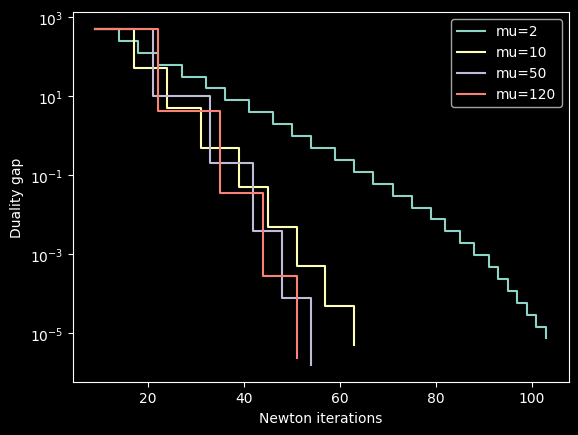

In [7]:
muvals = [2, 10, 50, 120]
data = []
for mu in muvals:
    start_time = time.time()
    x, iters, gaps = int_pt_lp_ieq(A, b, c, x0, mu, 1e-5, np_solver=True)
    print("Time taken:", time.time() - start_time)
    print(f"Converged c^Tx (with mu={mu})", c @ x)
    print("Primal feasibility inequality", np.all(A @ x < b))
    print()
    l = len(gaps)
    iters_ext, gaps_ext = [], []
    for i in range(l - 1):
        iters_ext.extend([iters[i] - 1, iters[i + 1] - 1])
        gaps_ext.extend([gaps[i], gaps[i]])
    iters_ext.append(iters[-1] - 1)
    gaps_ext.append(gaps[-1])
    data.append((iters_ext, gaps_ext))

plt.figure(1)
for i, mu in enumerate(muvals):
    plt.semilogy(data[i][0], data[i][1], label=f"mu={mu}")
plt.xlabel("Newton iterations")
plt.ylabel("Duality gap")
plt.legend()
plt.show()

#### LP with both inequality and equality constraints

We write the primal problem

$$\min c^Tx, \,\, \text{s.t. } Ax= b, -x\leq 0, A\in \mathbf{R}^{m\times n}$$

and the dual

$$\max -b^T\nu, \,\, \text{s.t. } A^T\nu-\lambda+c=0, \lambda\geq 0$$

or simply

$$\max -b^T\nu, \,\, \text{s.t. } A^T\nu+c\geq0$$

With log-barrier function, the original problem becomes

$$\min tc^Tx-\sum \log(x), \,\, \text{s.t. } Ax= b$$

The gradient is

$$\nabla f(x)=tc-\text{diag}\left(\frac{1}{x}\right)\mathbf{1}$$

The Hessian is

$$\nabla^2 f(x)=\text{diag}\left(\frac{1}{x^2}\right)$$

In [8]:
np.random.seed(42)

m, n = 50, 100
A = np.random.randn(m, n)
x0 = np.random.rand(n) # primal feasibilit for inequality
b = A @ x0 # primal feasibility for equality
z = np.random.randn(m)
c = A.T @ z + np.random.rand(n) # dual feasibility
print("Initial objective value", c @ x0)
print(A.shape)
print(b.shape)
print(c.shape)
print(x0.shape)

Initial objective value -0.9716215800840331
(50, 100)
(50,)
(100,)
(100,)


In [9]:
# Solve using CVXPY
x_var = cp.Variable(n)
constraints = [A @ x_var == b, x_var >= 0]
objective = cp.Minimize(c.T @ x_var)
problem = cp.Problem(objective, constraints)

start_time = time.time()
result = problem.solve(solver=cp.SCS, eps=1e-6)
print("Time taken:", time.time() - start_time)

print("Optimal objective value (CVXPY):", result)
# print("Optimal x (CVXPY):", x_var.value)
print("Feasibility (CVXPY):", np.allclose(A @ x_var.value, b))
print("Non-negativity (CVXPY):", np.all(x_var.value >= 0))

Time taken: 0.030606746673583984
Optimal objective value (CVXPY): -14.901129108789444
Feasibility (CVXPY): True
Non-negativity (CVXPY): False


We use standard Newton's method with equality constraints

In [10]:
def int_pt_lp_eq_ieq(A, b, c, x_0, mu, n_iter=100, np_solver=False):
    alpha = 0.01
    beta = 0.5
    tol = 1e-3  # Tolerance for duality gap
    tol_nt = 1e-5  # Tolerance for Newton decrement
    n_iter = n_iter

    f_list = []
    gaps = []
    inner_iter = []
    x_list = []
    t = 1.0

    x=x_0.copy()

    c = c.flatten() if c.ndim > 1 else c
    x = x.flatten() if x.ndim > 1 else x

    m, n = A.shape

    for k in range(n_iter):
        f = t * c @ x - np.sum(np.log(x))
        g = t * c - 1.0 / x
        f_list.append(f)
        hess_f_inv = np.diag(x**2)

        # Solve KKT equations use block elimination

        # A hess^-1 A^T nu = - A hess^-1 g
        if np_solver:
            nu = np.linalg.solve(A @ hess_f_inv @ A.T, - A @ hess_f_inv @ g)
        else:
            try:
                L = cholesky_factorization(A @ hess_f_inv @ A.T)
                nu = forward_substitution(L, - A @ hess_f_inv @ g)
                nu = back_substitution(L.T, nu)
            except Exception as e:
                print(e)
                break

        # hess dx = - (g + A^T nu)
        dx = - hess_f_inv @ (g + A.T @ nu)

        # Newton decrement
        nt_decre_sq = - g @ dx
        if abs(nt_decre_sq / 2) < tol_nt:
            # Evaluate duality gap in original problem

            # Scale nu
            # nu = - nu/t
            # gap = x @ (c - A.T @ nu)
            gap = m / t # upper bound

            inner_iter.append(k)
            gaps.append(gap)
            if gap < tol_nt:
                return x, inner_iter, gaps, x_list

            t *= mu

        s = 1.0

        # Ensure feasibility
        while np.min(x + s * dx) <= 0:
            s *= beta

        # Line search on f
        while s * t * c @ dx - np.sum(np.log(1 + s * dx / x)) > alpha * s * (g @ dx):
            s *= beta

        x += s * dx
        x_list.append(x)

    return x, inner_iter, gaps, x_list

Time taken: 1.2789311408996582
Converged c^Tx (with mu=2) -14.899599954713407
Primal feasibility inequality True
Primal feasibility equality True

Time taken: 1.4330780506134033
Converged c^Tx (with mu=10) -14.900625811613008
Primal feasibility inequality True
Primal feasibility equality True

Time taken: 3.6557748317718506
Converged c^Tx (with mu=50) -14.900725629449894
Primal feasibility inequality True
Primal feasibility equality True

Time taken: 2.1184890270233154
Converged c^Tx (with mu=120) -14.901096864346234
Primal feasibility inequality True
Primal feasibility equality True



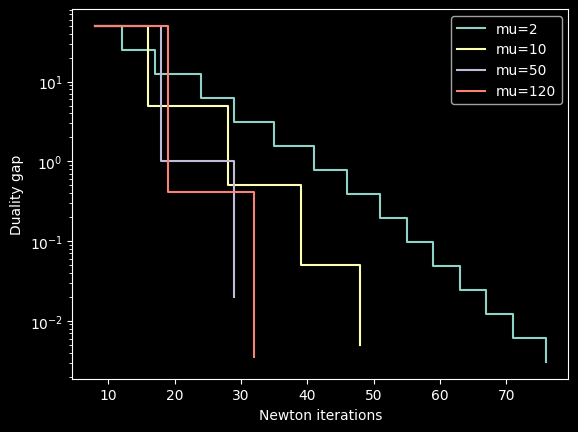

In [11]:
muvals = [2, 10, 50, 120]
data = []
for mu in muvals:
    start_time = time.time()
    x, iters, gaps, x_list = int_pt_lp_eq_ieq(A, b, c, x0, mu, np_solver=False)
    print("Time taken:", time.time() - start_time)
    print(f"Converged c^Tx (with mu={mu})", c @ x)
    print("Primal feasibility inequality", np.all(x >= 0))
    print("Primal feasibility equality", np.allclose(A @ x, b))
    print()
    l = len(gaps)
    iters_ext, gaps_ext = [], []
    for i in range(l - 1):
        iters_ext.extend([iters[i] - 1, iters[i + 1] - 1])
        gaps_ext.extend([gaps[i], gaps[i]])
    iters_ext.append(iters[-1] - 1)
    gaps_ext.append(gaps[-1])
    data.append((iters_ext, gaps_ext))

plt.figure(1)
for i, mu in enumerate(muvals):
    plt.semilogy(data[i][0], data[i][1], label=f"mu={mu}")
plt.xlabel("Newton iterations")
plt.ylabel("Duality gap")
plt.legend()
plt.show()

#### Feasibility problem

We need to compute a `strictly feasible starting point` for barrier method

Find $x$, such that $f_i(x)< 0, i=1, \cdots, m, \, Ax=b$

##### Basic method

$$\min_{x, s} s\,\,\, \text{s.t. } f_i(x)\leq s, i=1, \cdots, m,\,\, Ax=b$$

* if $x, s$ feasible, with $s<0$, $x$ is strictly feasible for feasibility problem, and we can start barrier iterations
* if optimal $s$ is positive, then no $x$ is feasible
* if zero and attained, then $x$ is feasible (but not strictly)
* if zero, not attained, then no $x$ is feasible

##### LP example

For our LP (assume `strictly` feasible, otherwise boundary situation can be trick)

$$\min c^Tx, \,\, \text{s.t. } Ax= b, -x\leq 0, A\in \mathbf{R}^{m\times n}$$

we can form the feasibility problem as

$$\min_{t, x} t, \,\, \text{s.t. } Ax= b, x\geq(1-t)\mathbf{1}, t\geq 0 $$

The original LP is strictly feasible if and only if $t^*<1$

Rewrite using $z=\begin{bmatrix}x+(t-1)\mathbf{1} \\t\end{bmatrix}$ as input, we have

$$\min_z c_1^Tz, \,\, \text{s.t. } A_1z=b_1, -z \leq 0$$

where

$$c_1=\begin{bmatrix}0\\0\\\vdots
\\0\\1\end{bmatrix},\,\,A_1=\begin{bmatrix}A & -A\mathbf{1}\end{bmatrix},\,\,b_1=b-A\mathbf{1}$$

We solve this feasibility problem (which is an LP itself), and we are done if the last entry in $z<1$

In [12]:
x_feas = np.linalg.lstsq(A, b, rcond=None)[0].reshape(-1, 1)  # Get feasible x
print("x_feas >= 0?", np.all(x_feas >= 0)) # If this is True, then we are done

if not np.all(x_feas >= 0):
    t0 = -np.min(x_feas) + 2
    print(t0)
    print("t0 >= 0?", t0 >= 0)

    A1 = np.hstack((A, -A @ np.ones((n, 1))))
    b1 = b - A @ np.ones((n, 1))

    x0 = x_feas + t0 * np.ones((n, 1)) - np.ones((n, 1))
    print("x0 >= 0?", np.all(x0 >= 0))

    c1 = np.vstack((np.zeros((n, 1)), np.array([[1]])))
    z0 = np.vstack((x0, np.array([[t0]])))

    print("A1.shape:", A1.shape)
    print("b1.shape:", b1.shape)
    print("c1.shape:", c1.shape)
    print("z0.shape:", z0.shape)
    print(z0[-1])

x_feas >= 0? False
2.460745600994705
t0 >= 0? True
x0 >= 0? True
A1.shape: (50, 101)
b1.shape: (50, 50)
c1.shape: (101, 1)
z0.shape: (101, 1)
[ 2.4607]


In [13]:
_, _, _, z_list = int_pt_lp_eq_ieq(A1, b1, c1, z0, mu=50, n_iter=50, np_solver=False)

In [14]:
for z in z_list:
    # Check t < 1, if so, original problem is strictly feasible
    if z[-1] < 1:
        # Verify x+(t-1)1 >= 0
        x_strictly_feas = np.all(z[:-1] >= 0)
        if x_strictly_feas:
            x0 = z[:-1] - z[-1]  + 1
            print("Original LP strictly feasible?", x_strictly_feas)
            break

Original LP strictly feasible? True


We will solve the original LP using this initial point x0 from the solution of the feasibility problem

Initial objective value 41.35713192061179

Time taken: 1.4920539855957031
Converged c^Tx (with mu=2) -14.898074894641747
Primal feasibility inequality True
Primal feasibility equality True

Time taken: 1.7763009071350098
Converged c^Tx (with mu=10) -14.900625647237428
Primal feasibility inequality True
Primal feasibility equality True

Time taken: 2.1209747791290283
Converged c^Tx (with mu=50) -14.900725545098368
Primal feasibility inequality True
Primal feasibility equality True

Time taken: 2.5975263118743896
Converged c^Tx (with mu=120) -14.901096177462087
Primal feasibility inequality True
Primal feasibility equality True



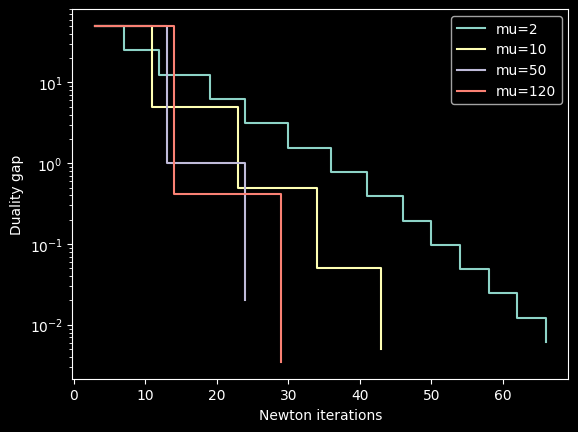

In [15]:
print("Initial objective value", c @ x0)
print()
muvals = [2, 10, 50, 120]
data = []
for mu in muvals:
    start_time = time.time()
    x, iters, gaps, x_list = int_pt_lp_eq_ieq(A, b, c, x0, mu, np_solver=False)
    print("Time taken:", time.time() - start_time)
    print(f"Converged c^Tx (with mu={mu})", c @ x)
    print("Primal feasibility inequality", np.all(x >= 0))
    print("Primal feasibility equality", np.allclose(A @ x, b))
    print()
    l = len(gaps)
    iters_ext, gaps_ext = [], []
    for i in range(l - 1):
        iters_ext.extend([iters[i] - 1, iters[i + 1] - 1])
        gaps_ext.extend([gaps[i], gaps[i]])
    iters_ext.append(iters[-1] - 1)
    gaps_ext.append(gaps[-1])
    data.append((iters_ext, gaps_ext))

plt.figure(1)
for i, mu in enumerate(muvals):
    plt.semilogy(data[i][0], data[i][1], label=f"mu={mu}")
plt.xlabel("Newton iterations")
plt.ylabel("Duality gap")
plt.legend()
plt.show()

#### Infeasible start Newton's method for LP

We can also use infeasible start Newton's method without having to relying on phase I

We write the problem objective again

$$\min tc^Tx-\sum \log(x), \,\, \text{s.t. } Ax= b$$

The gradient is

$$\nabla f(x)=tc-\text{diag}\left(\frac{1}{x}\right)\mathbf{1}$$

The Hessian is

$$\nabla^2 f(x)=\text{diag}\left(\frac{1}{x^2}\right)$$

Recall for infeasible start Newton's method, the KKT equations are

$$\boxed{\begin{bmatrix}\nabla^2 f(x) & A^T\\ A & 0 \end{bmatrix}\begin{bmatrix} \Delta x_{nt} \\ \Delta \nu_{nt} \end{bmatrix}=-\begin{bmatrix}\nabla f(x)+A^T\nu \\ Ax-b \end{bmatrix}}$$

and we will solve through block elimination

$$\begin{bmatrix}
H & A^T \\ A & 0
\end{bmatrix}\begin{bmatrix}
v\\ w
\end{bmatrix}=-\begin{bmatrix}
g\\h
\end{bmatrix}$$

* if $H$ is nonsingular
$$AH^{-1}A^Tw=h-AH^{-1}g,\,\, Hv=-(g+A^Tw)$$

The following steps are followed for each $t$

Start with a point $x\in \text{dom }f$ and $\nu$
* compute primal and dual Newton `step` $\Delta x_{nt}, \Delta \nu_{nt}$
* line search for `step size`, starting at $s=1$, backtrack $s\leftarrow \beta s$ until
$$\|r(x+s\Delta x_{nt}, \nu+s\Delta \nu_{nt})\|_2\leq (1-\alpha s)\|r(x, \nu)\|_2$$
* update
$$x\leftarrow x+s\Delta x_{nt}, \nu\leftarrow \nu+s\Delta \nu_{nt}$$
* terminate if $Ax=b$ and $\|r(x,\nu)\|_2\leq \epsilon$

Update $t\leftarrow \mu t$, repeat these steps

In [16]:
def int_pt_lp_eq_ieq_infeasible_start(A, b, c, mu, n_iter=500, np_solver=False):
    alpha = 0.01
    beta = 0.3
    tol_norm = 1e-6
    tol_gap = 1e-3
    m, n = A.shape

    rp_list = []
    rd_list = []
    r_list = []
    gaps = []
    inner_iter = []

    # infeasible start
    np.random.seed(42)
    t = 1.0
    x = np.random.rand(n) + 0.1
    print("Feasible initial x?", np.allclose(A @ x, b))
    print("Initial objective value", c @ x)
    nu = np.zeros(m)

    # Outer loop: increase t until gap is small enough or max iterations reached
    total_iters = 0
    while total_iters < n_iter:
        # Inner loop: solve centering problem for fixed t
        for k in range(n_iter):
            total_iters += 1
            rp = A @ x - b
            rd = t * c - 1.0 / x + A.T @ nu
            rp_list.append(np.linalg.norm(rp))
            rd_list.append(np.linalg.norm(rd))
            norm_r = np.linalg.norm(np.hstack([rd, rp]))
            r_list.append(norm_r)

            # Check convergence for the current t
            if norm_r < tol_norm:
                gap = m / t # upper bound
                inner_iter.append(k + total_iters) # k is local, so need to add total_iters
                gaps.append(gap)
                if gap < tol_gap:
                    # Sufficiently close to optimal solution
                    return x, inner_iter, gaps
                else:
                    t *= mu
                    break

            hess_f_inv = np.diag(x**2)

            # Solve KKT equations use block elimination
            # A hess^-1 A^T dnu = rp - A hess^-1 rd
            if np_solver:
                dnu = np.linalg.solve(A @ hess_f_inv @ A.T, rp - A @ hess_f_inv @ rd)
            else:
                try:
                    L = cholesky_factorization(A @ hess_f_inv @ A.T)
                    dnu = forward_substitution(L, rp - A @ hess_f_inv @ rd)
                    dnu = back_substitution(L.T, dnu)
                except Exception as e:
                    print(e)
                    break

            # hess dx = - (rd + A^T dnu)
            dx = - hess_f_inv @ (rd + A.T @ dnu)

            s = 1.0
            # Ensure feasibility
            while np.min(x + s * dx) <= 0:
                s *= beta
            # Line search on norm of residual
            while np.linalg.norm(
                np.hstack([t * c - 1.0 / (x + s * dx) + A.T @ (nu + s * dnu), A @ (x + s * dx) - b])
            ) > (1 - alpha * s) * norm_r:
                s *= beta

            x += s * dx
            nu += s * dnu
        else:
            # If we complete the for-loop without a break, it means we didn't
            # meet the norm_r < tol condition and didn't return.
            # We've hit max iterations without convergence.
            break

    return x, inner_iter, gaps

Feasible initial x? False
Initial objective value 29.846488899047426
Time taken: 0.6420660018920898
Converged c^Tx (with mu=2) -14.900362698773435
Primal feasibility inequality True
Primal feasibility equality True

Feasible initial x? False
Initial objective value 29.846488899047426
Time taken: 0.3558061122894287
Converged c^Tx (with mu=10) -14.900625606848644
Primal feasibility inequality True
Primal feasibility equality True

Feasible initial x? False
Initial objective value 29.846488899047426
Time taken: 0.24744844436645508
Converged c^Tx (with mu=50) -14.900725598950485
Primal feasibility inequality True
Primal feasibility equality True

Feasible initial x? False
Initial objective value 29.846488899047426
Time taken: 0.3151264190673828
Converged c^Tx (with mu=120) -14.901096650989388
Primal feasibility inequality True
Primal feasibility equality True



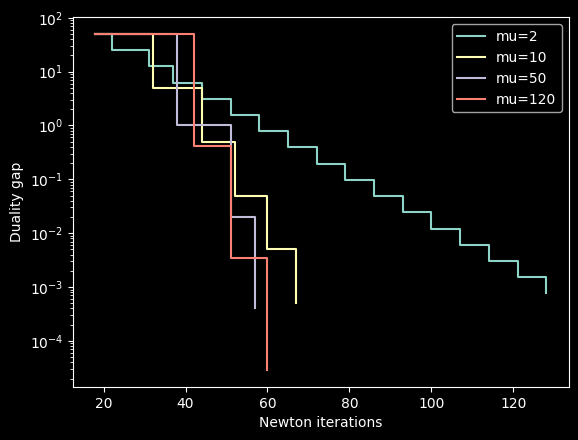

In [17]:
muvals = [2, 10, 50, 120]
data = []
for mu in muvals:
    start_time = time.time()
    x, iters, gaps = int_pt_lp_eq_ieq_infeasible_start(A, b, c, mu=mu, np_solver=False)
    print("Time taken:", time.time() - start_time)
    print(f"Converged c^Tx (with mu={mu})", c @ x)
    print("Primal feasibility inequality", np.all(x >= 0))
    print("Primal feasibility equality", np.allclose(A @ x, b))
    print()
    l = len(gaps)
    iters_ext, gaps_ext = [], []
    for i in range(l - 1):
        iters_ext.extend([iters[i] - 1, iters[i + 1] - 1])
        gaps_ext.extend([gaps[i], gaps[i]])
    iters_ext.append(iters[-1] - 1)
    gaps_ext.append(gaps[-1])
    data.append((iters_ext, gaps_ext))

plt.figure(1)
for i, mu in enumerate(muvals):
    plt.semilogy(data[i][0], data[i][1], label=f"mu={mu}")
plt.xlabel("Newton iterations")
plt.ylabel("Duality gap")
plt.legend()
plt.show()